## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.tsv",sep='\t')
df.head(6)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [55]:
df[['BMI','AGE','SEX','BP','S1','S2','S3','S4','S5','S6','Y']].mean()


BMI     26.375792
AGE     48.518100
SEX      1.468326
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

<Figure size 640x480 with 0 Axes>

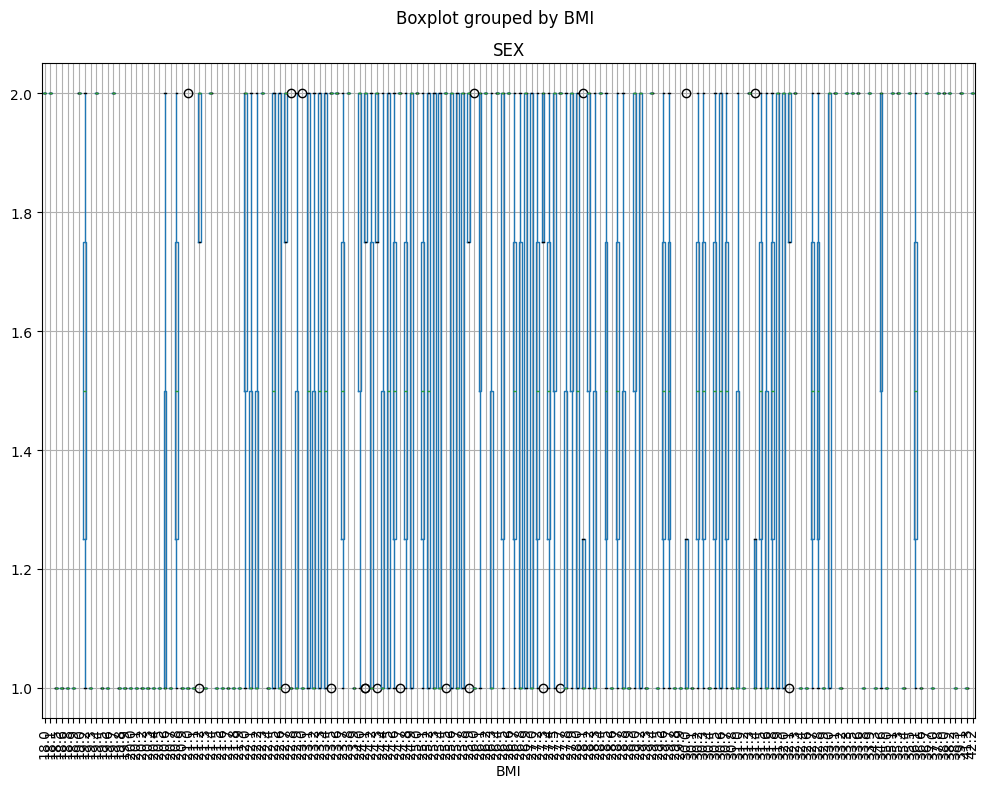

In [58]:
plt.figure().patch.set_facecolor('white')
df.boxplot(column='SEX',by='BMI',  figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

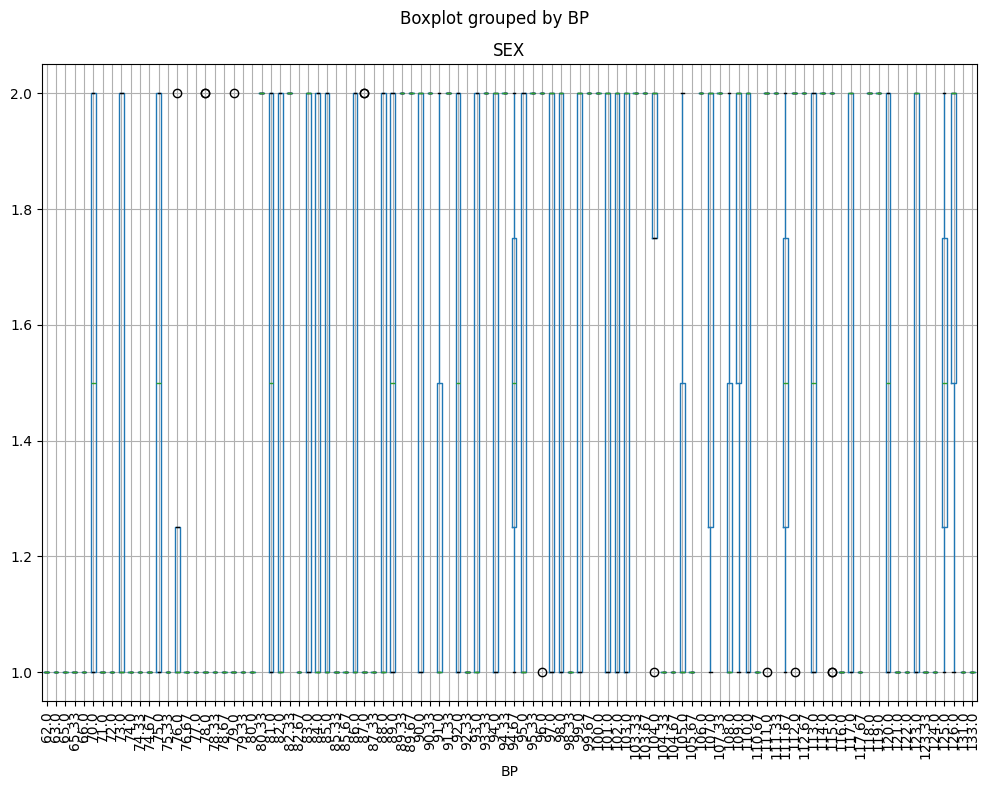

In [52]:
plt.figure().patch.set_facecolor('white')
df.boxplot(column='SEX',by='BP',  figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

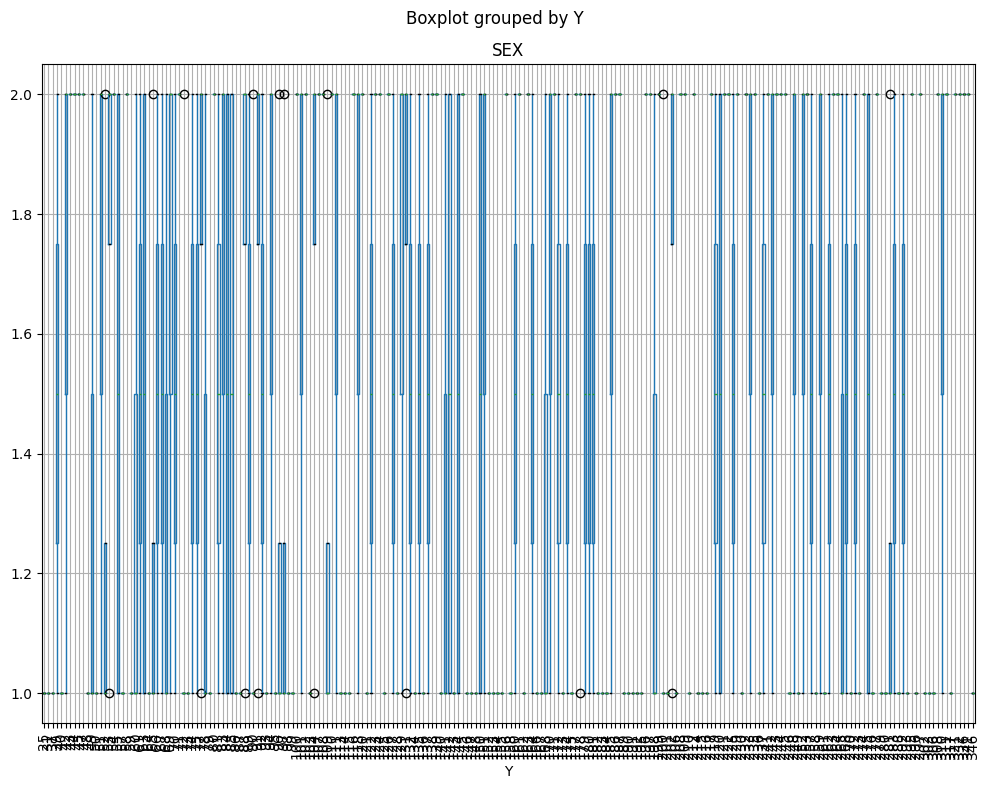

In [59]:
plt.figure().patch.set_facecolor('white')
df.boxplot(column='SEX',by='Y',  figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

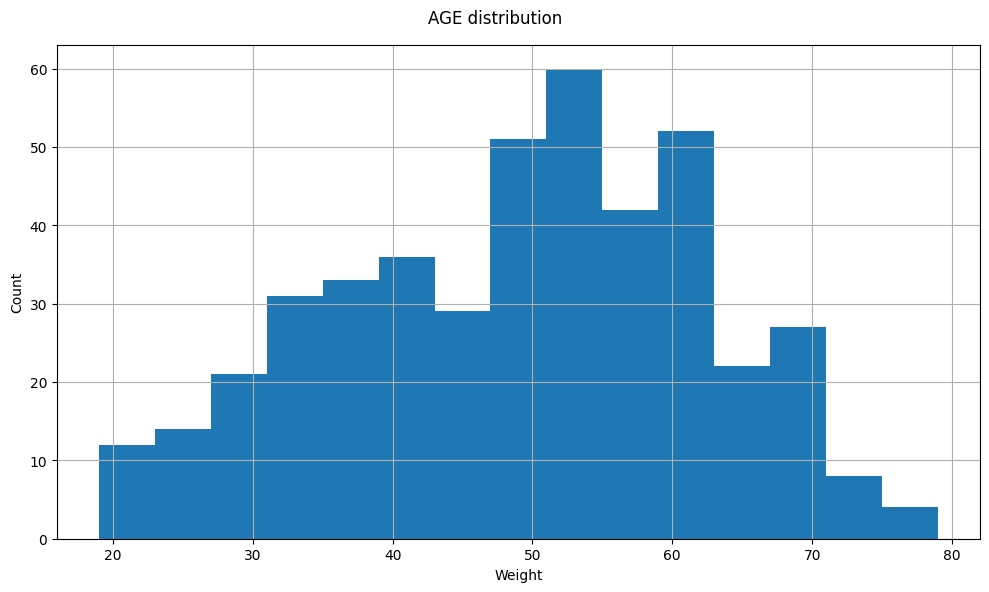

In [60]:
plt.figure().patch.set_facecolor('white')
df['AGE'].hist(bins=15, figsize=(10,6))
plt.suptitle('AGE distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


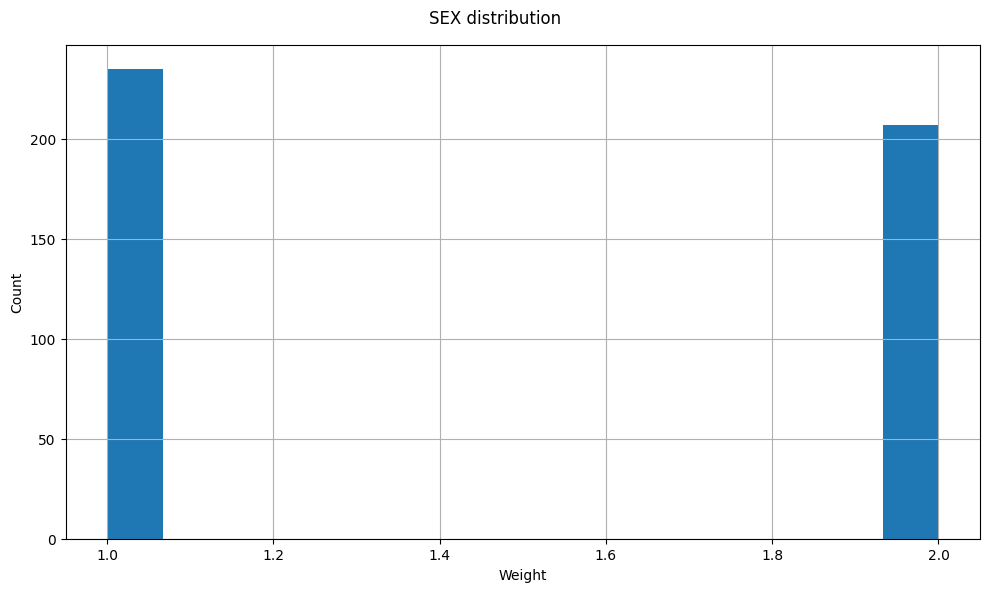

In [61]:
plt.figure().patch.set_facecolor('white')
df['SEX'].hist(bins=15, figsize=(10,6))
plt.suptitle('SEX distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


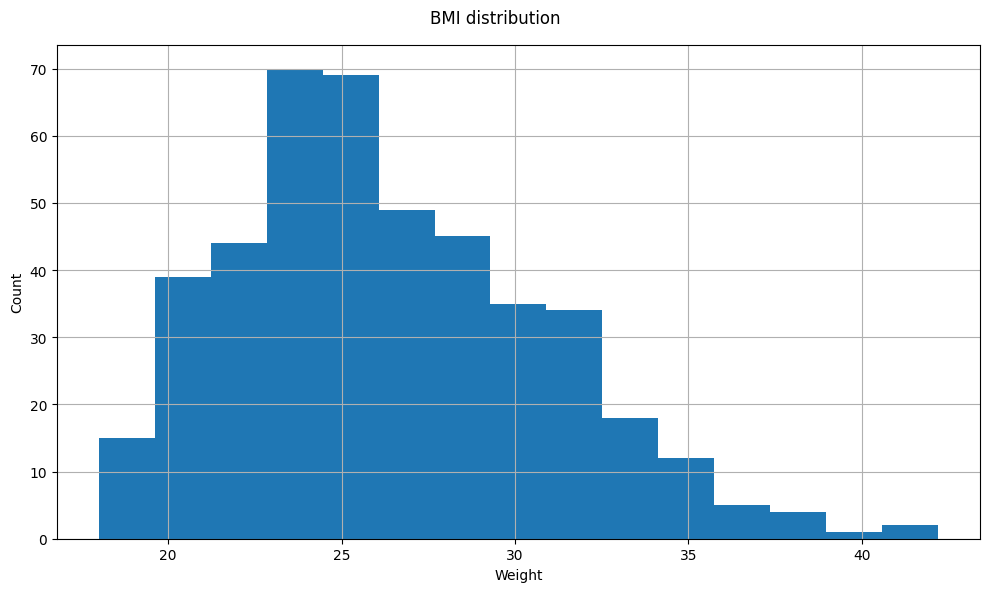

In [62]:
plt.figure().patch.set_facecolor('white')
df['BMI'].hist(bins=15, figsize=(10,6))
plt.suptitle('BMI distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


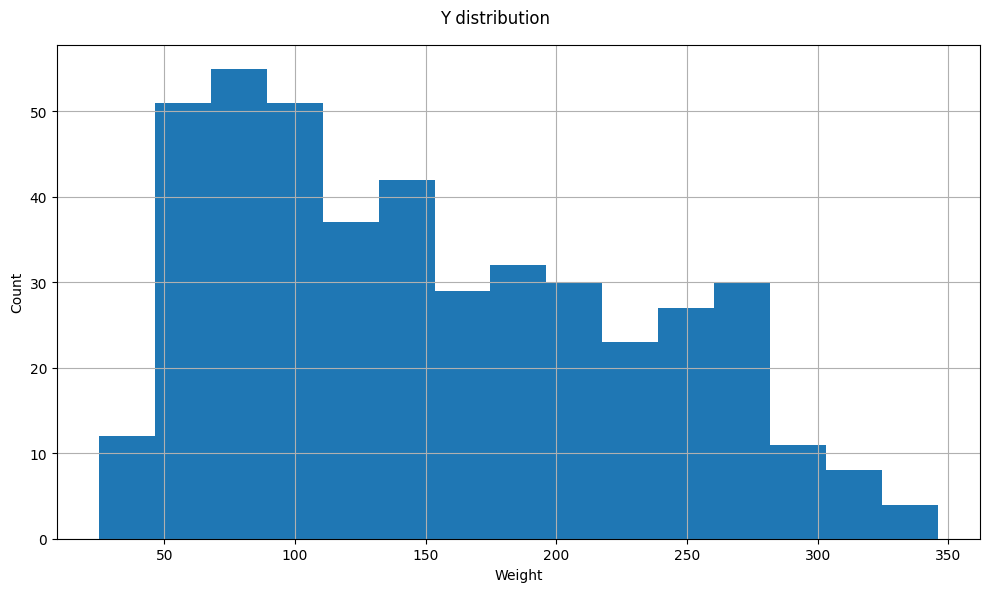

In [64]:
plt.figure().patch.set_facecolor('white')
df['Y'].hist(bins=15, figsize=(10,6))
plt.suptitle('Y distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


由上面几个可得
AGE：正态分布
SEX：二项分布
BMI: 正态分布
Y  : 正态分布

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

这里选取了两个为例，进行了计算与判断，下面为例子

In [75]:
np.corrcoef(df['SEX'],df['Y'].fillna(method='pad'))


C:\Users\23907\AppData\Local\Temp\ipykernel_34552\1711502291.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  np.corrcoef(df['SEX'],df['Y'].fillna(method='pad'))


array([[1.      , 0.043062],
       [0.043062, 1.      ]])

In [76]:
np.corrcoef(df['BMI'],df['Y'].fillna(method='pad'))


C:\Users\23907\AppData\Local\Temp\ipykernel_34552\2959875300.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  np.corrcoef(df['BMI'],df['Y'].fillna(method='pad'))


array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [71]:
df.groupby('SEX').agg({ 'S1' : 'mean', 'S2' : 'mean','S3' : 'mean', 'S4' : 'mean','S5' : 'mean','S6' : 'mean', 'Y' : 'mean', 'AGE' : 'count'}).rename(columns={ 'AGE' : 'Count'})

,S1,S2,S3,S4,S5,S6,Y,Count
SEX,,,,,,,,
1,187.995745,111.372340,54.385106,3.668468,4.567993,89.017021,149.021277,235
2,190.439614,120.056039,44.570048,4.526377,4.724760,93.806763,155.666667,207


In [73]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


由于p较大所以不能认为二者有区别，也就是二者进展差别不大